In [1]:
import numpy as np
data_path1 = "/Users/waelbenslima/Desktop/data/phitwo1.txt"
data1 = np.loadtxt(data_path1)
data_reshaped1 = data1.reshape((1331, 171, 171))

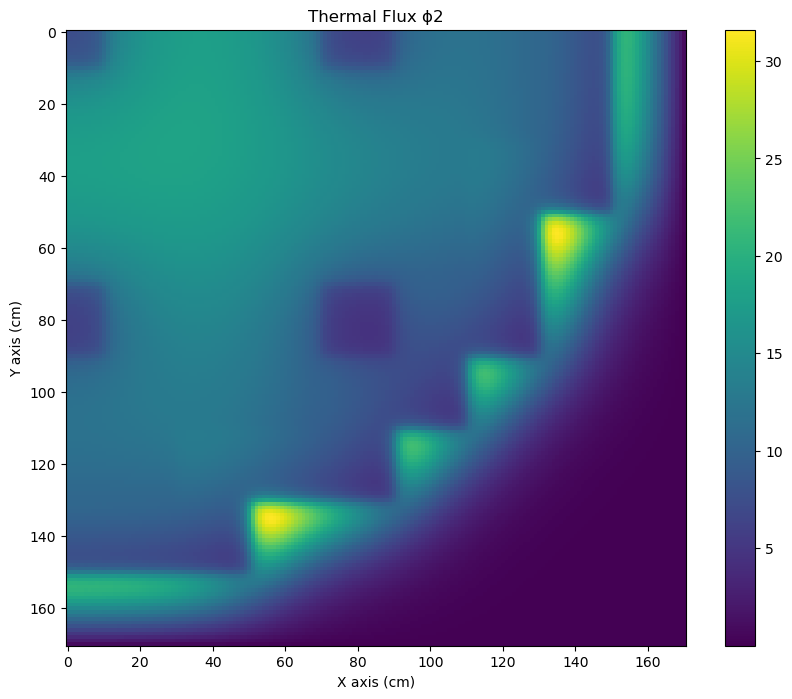

In [7]:
import matplotlib.pyplot as plt
first_matrix1 = data_reshaped1[0].reshape(171, 171)

# Create a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(first_matrix1, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Thermal Flux ϕ2')
plt.xlabel('X axis (cm)')
plt.ylabel('Y axis (cm)')
plt.show()

## 1- Auto Encoder 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 171, 171, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 86, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 43, 43, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 86, 86, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 86, 86, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 172, 172, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 172, 172, 1)    │           289 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping2d (Cropping2D)         │ (None, 171, 171, 1)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 559ms/step - loss: 0.0536 - val_loss: 0.0010
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 590ms/step - loss: 0.0010 - val_loss: 4.1626e-04
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 661ms/step - loss: 3.6412e-04 - val_loss: 2.3399e-04
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 643ms/step - loss: 2.2785e-04 - val_loss: 1.5545e-04
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 587ms/step - loss: 1.7383e-04 - val_loss: 1.1329e-04
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 597ms/step - loss: 1.0490e-04 - val_loss: 8.9481e-05
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 558ms/step - loss: 1.1323e-04 - val_loss: 8.2952e-05
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 558ms/step - loss: 6.9340e-05 - val_loss: 5.4661e-05
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 543ms/step - loss: 9.1189e-05 - val_loss: 6.6042e-05
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 549ms/step - loss: 5.3305e-05 - val_loss: 6.0971e-05
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 547ms/step - loss:

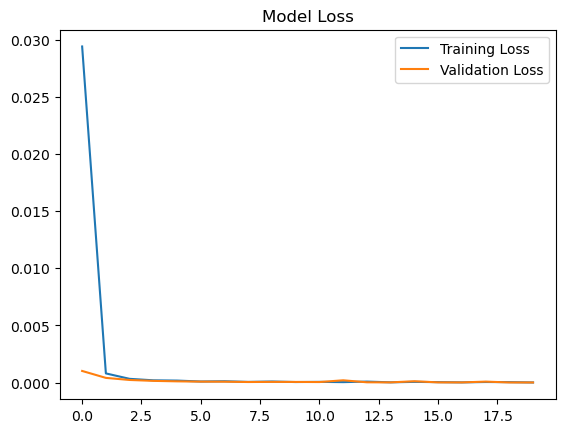

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Load the data
phi2 = data_reshaped1.reshape((1331, 171, 171, 1))  # Shape: (1331, 171, 171, 1) (phi2)

# Normalize the data
phi2_norm = phi2 / np.max(phi2)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(phi2_norm, phi2_norm, test_size=0.2, random_state=42)

# Define the AutoEncoder Model 
input_shape = (171, 171, 1)

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
    layers.Cropping2D(cropping=((0, 1), (0, 1)))  # Crop to match (171, 171)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


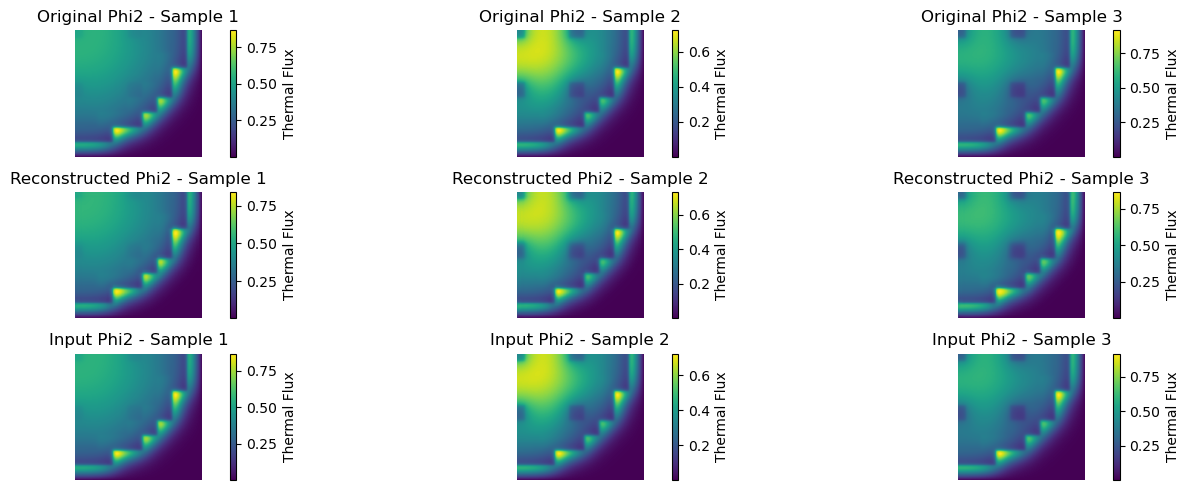

In [13]:
# Predict phi2 from phi2 
predicted_phi2 = model.predict(X_test)

# Visualize results
n_samples = 3  # Number of samples to display
plt.figure(figsize=(15, 5))

for i in range(n_samples):
    # Original Phi2 
    plt.subplot(3, n_samples, i + 1)
    plt.imshow(y_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Thermal Flux')
    plt.title(f'Original Phi2 - Sample {i+1}')  # Changed label here
    plt.axis('off')

    # Reconstructed Phi2 
    plt.subplot(3, n_samples, i + 1 + n_samples)
    plt.imshow(predicted_phi2[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Thermal Flux')
    plt.title(f'Reconstructed Phi2 - Sample {i+1}')
    plt.axis('off')

    # Input Phi2 
    plt.subplot(3, n_samples, i + 1 + 2 * n_samples)
    plt.imshow(X_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Thermal Flux')
    plt.title(f'Input Phi2 - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Flatten the arrays to (N, height * width)
y_test_flat = y_test.flatten()
predicted_phi2_flat = predicted_phi2.flatten()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_flat, predicted_phi2_flat))
print(f"RMSE: {rmse}")

# Calculate L∞ Error (Maximum absolute error)
l_inf_error = np.max(np.abs(y_test_flat - predicted_phi2_flat))
print(f"L∞ Error: {l_inf_error}")

# Calculate SSIM (Structural Similarity Index)
# SSIM requires images to be in the shape (height, width)
ssim_index = np.mean([ssim(y_test[i].squeeze(), predicted_phi2[i].squeeze(), data_range=1) for i in range(3)])  # for 3 samples
print(f"SSIM: {ssim_index}")

# Calculate Relative L2 Error
true_l2_norm = np.linalg.norm(y_test_flat)  # Flatten for L2 norm calculation
relative_l2_error = np.linalg.norm(y_test_flat - predicted_phi2_flat) / true_l2_norm
print(f"Relative L2 Error: {relative_l2_error:.2%}")


RMSE: 0.0037766266381672547
L∞ Error: 0.1129298069231468
SSIM: 0.9937809095241938
Relative L2 Error: 1.07%


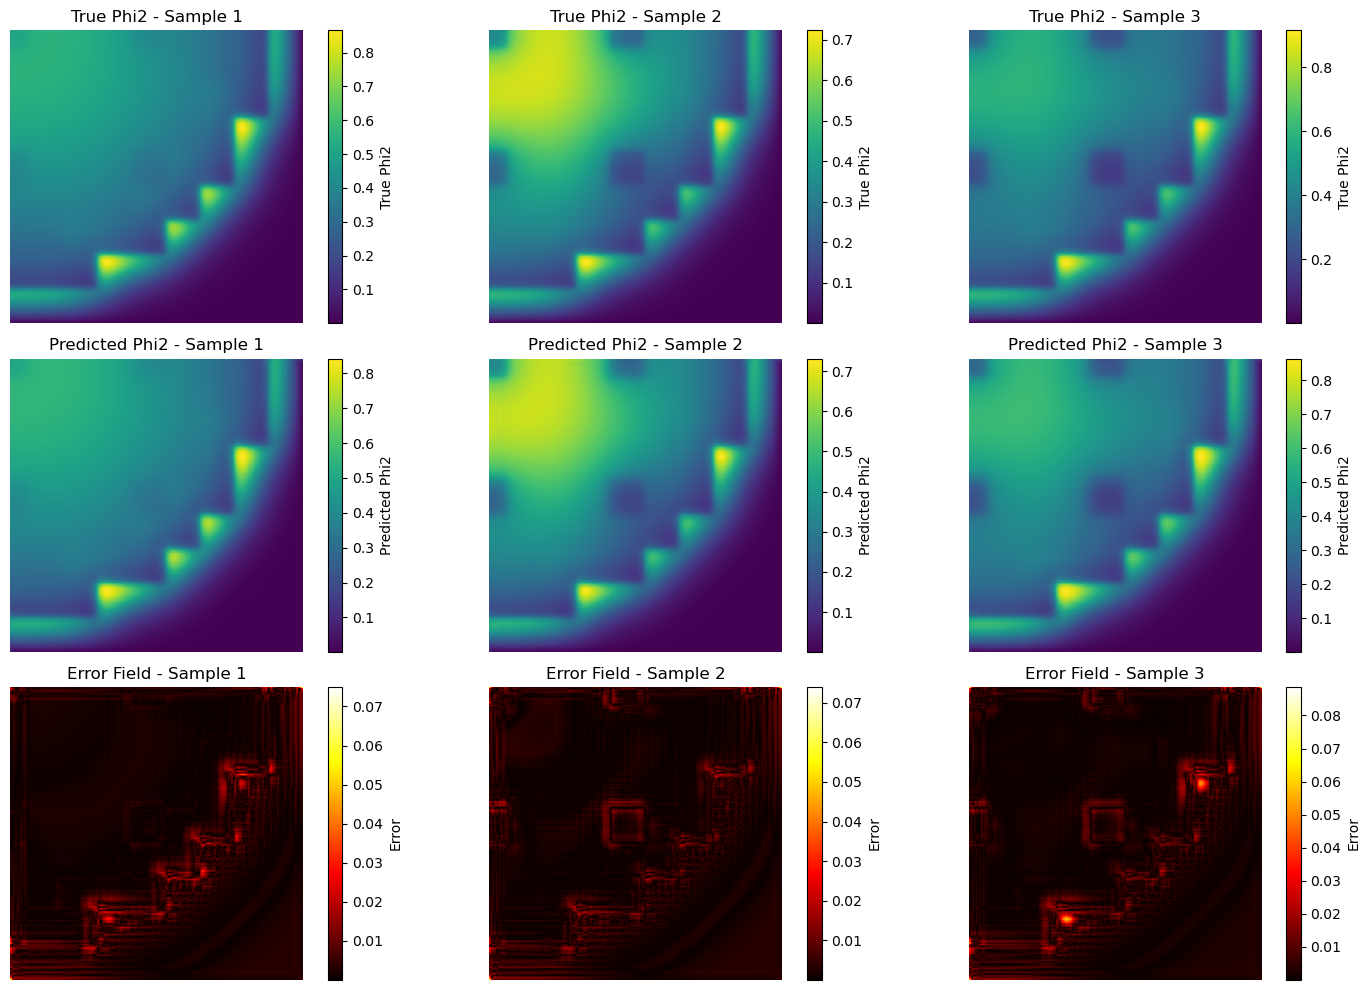

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Number of samples to visualize
n_samples = 3

# Plot the error fields
plt.figure(figsize=(15, 10))

for i in range(n_samples):
    # Calculate the error field for each sample (absolute difference between true and predicted)
    error_field = np.abs(y_test[i] - predicted_phi2[i])
    
    # Plot the error field
    plt.subplot(3, n_samples, i + 1)
    plt.imshow(y_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='True Phi2')
    plt.title(f'True Phi2 - Sample {i+1}')
    plt.axis('off')

    plt.subplot(3, n_samples, i + 1 + n_samples)
    plt.imshow(predicted_phi2[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Predicted Phi2')
    plt.title(f'Predicted Phi2 - Sample {i+1}')
    plt.axis('off')

    # Plot the error field
    plt.subplot(3, n_samples, i + 1 + 2 * n_samples)
    plt.imshow(error_field.squeeze(), cmap='hot', extent=[0, 171, 0, 171])
    plt.colorbar(label='Error')
    plt.title(f'Error Field - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## 2- Mask encoder : 

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ phi2_input          │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mask_input          │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 171, 171,  │          0 │ phi2_input[0][0], │
│ (Multiply)          │ 1)                │            │ mask_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 171, 171,  │        320 │ multiply_2[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 86, 86,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 86, 86,    │     18,496 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 43, 43,    │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_6  │ (None, 43, 43,    │     36,928 │ max_pooling2d_7[… │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_6     │ (None, 86, 86,    │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_7  │ (None, 86, 86,    │     18,464 │ up_sampling2d_6[… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_7     │ (None, 172, 172,  │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 172, 172,  │        289 │ up_sampling2d_7[… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cropping2d_1        │ (None, 171, 171,  │          0 │ conv2d_11[0][0]   │
│ (Cropping2D)        │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 568ms/step - loss: 0.0575 - val_loss: 0.0025
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 563ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 611ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 617ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 746ms/step - loss: 8.1046e-04 - val_loss: 0.0012
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 699ms/step - loss: 7.8745e-04 - val_loss: 5.0236e-04
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 675ms/step - loss: 4.7061e-04 - val_loss: 4.1417e-04
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 773ms/step - loss: 4.4981e-04 - val_loss: 3.6395e-04
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 593ms/step - loss: 3.5995e-04 - val_loss: 3.4261e-04
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 595ms/step - loss: 3.2704e-04 - val_loss: 3.7445e-04
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 625ms/step - loss: 3.6872e-04 - val_loss: 

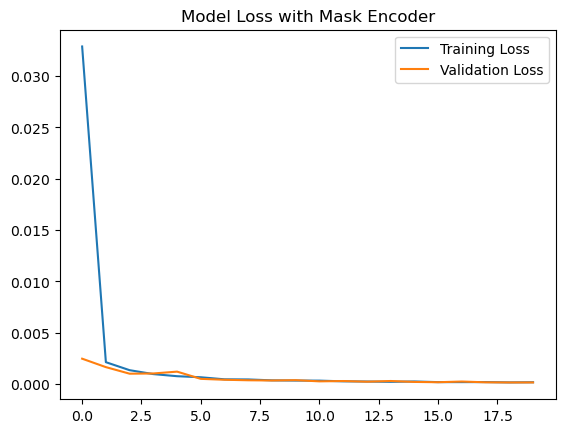

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

# Load and reshape data
phi2 = data_reshaped1.reshape((1331, 171, 171, 1))  # Shape: (1331, 171, 171, 1) (phi2)

# Normalize data
phi2_norm = phi2 / np.max(phi2)

# Create random masks for phi2 data
def generate_random_mask(shape, sparsity=0.8):
    """Generate a binary mask with a given sparsity"""
    mask = np.random.choice([0, 1], size=shape, p=[sparsity, 1 - sparsity])
    return mask

# Apply masks to the phi2 data
masks = np.array([generate_random_mask(phi2_norm[0].shape) for _ in range(len(phi2_norm))])
masked_phi2 = phi2_norm * masks  # Apply the masks to phi2

# Split into training and testing sets
X_train, X_test, y_train, y_test, masks_train, masks_test = train_test_split(
    masked_phi2, phi2_norm, masks, test_size=0.2, random_state=42
)

# Define the Mask Encoder Model
input_shape = (171, 171, 1)
mask_input_shape = (171, 171, 1)

phi2_input = layers.Input(shape=input_shape, name="phi2_input")
mask_input = layers.Input(shape=mask_input_shape, name="mask_input")

# Combine masked input
masked_phi2_input = layers.Multiply()([phi2_input, mask_input])

# Model for reconstruction
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(masked_phi2_input)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Cropping to handle dimensional mismatch
output = layers.Cropping2D(cropping=((0, 1), (0, 1)))(output)

# Create the model
model = models.Model(inputs=[phi2_input, mask_input], outputs=output)
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(
    [X_train, masks_train], y_train,
    validation_data=([X_test, masks_test], y_test),
    epochs=20,
    batch_size=32
)

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss with Mask Encoder')
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


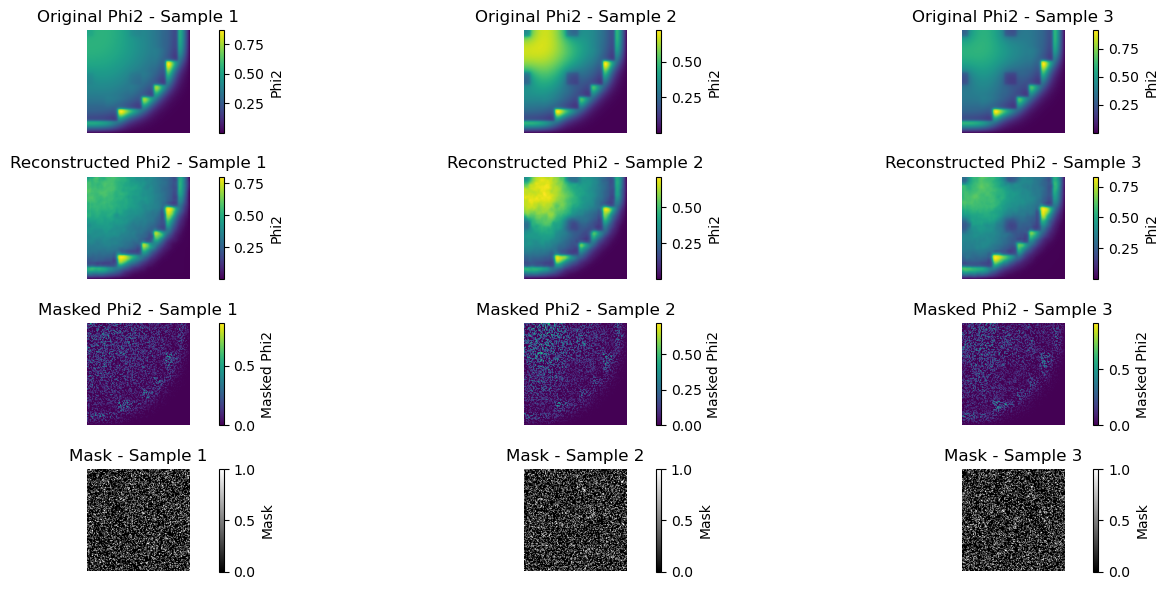

In [29]:
# Predict phi2 from masked phi2
predicted_phi2 = model.predict([X_test, masks_test])

# Visualize results
n_samples = 3  # Number of samples to display
plt.figure(figsize=(15, 6))
for i in range(n_samples):
    # Original Phi2
    plt.subplot(4, n_samples, i + 1)
    plt.imshow(y_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Phi2')
    plt.title(f'Original Phi2 - Sample {i+1}')
    plt.axis('off')

    # Reconstructed Phi2
    plt.subplot(4, n_samples, i + 1 + n_samples)
    plt.imshow(predicted_phi2[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Phi2')
    plt.title(f'Reconstructed Phi2 - Sample {i+1}')
    plt.axis('off')

    # Input Phi2 (Masked)
    plt.subplot(4, n_samples, i + 1 + 2 * n_samples)
    plt.imshow(X_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Masked Phi2')
    plt.title(f'Masked Phi2 - Sample {i+1}')
    plt.axis('off')

    # Mask
    plt.subplot(4, n_samples, i + 1 + 3 * n_samples)
    plt.imshow(masks_test[i].squeeze(), cmap='gray', extent=[0, 171, 0, 171])
    plt.colorbar(label='Mask')
    plt.title(f'Mask - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [31]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Predict phi1 from masked phi2
predicted_fast = model.predict([X_test, masks_test])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test.flatten(), predicted_fast.flatten()))
print(f"RMSE: {rmse}")

# Calculate L∞ error (maximum absolute error)
l_inf_error = np.max(np.abs(y_test - predicted_fast))
print(f"L∞ Error: {l_inf_error}")

# Calculate SSIM for the first sample
ssim_index = ssim(
    y_test[0].squeeze(), 
    predicted_fast[0].squeeze(), 
    data_range=predicted_fast[0].max() - predicted_fast[0].min()
)
print(f"SSIM: {ssim_index}")

# Calculate L2 error
l2_error = np.linalg.norm(y_test - predicted_fast)
print(f"L2 Error: {l2_error}")

# Calculate Relative L2 Error (as a percentage)
true_l2_norm = np.linalg.norm(y_test)
relative_l2_error = (l2_error / true_l2_norm) * 100  # Convert to percentage
print(f"Relative L2 Error: {relative_l2_error:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step
RMSE: 0.01232098895149142
L∞ Error: 0.20287257015977989
SSIM: 0.9542893569586849
L2 Error: 34.42685173703298
Relative L2 Error: 3.48%


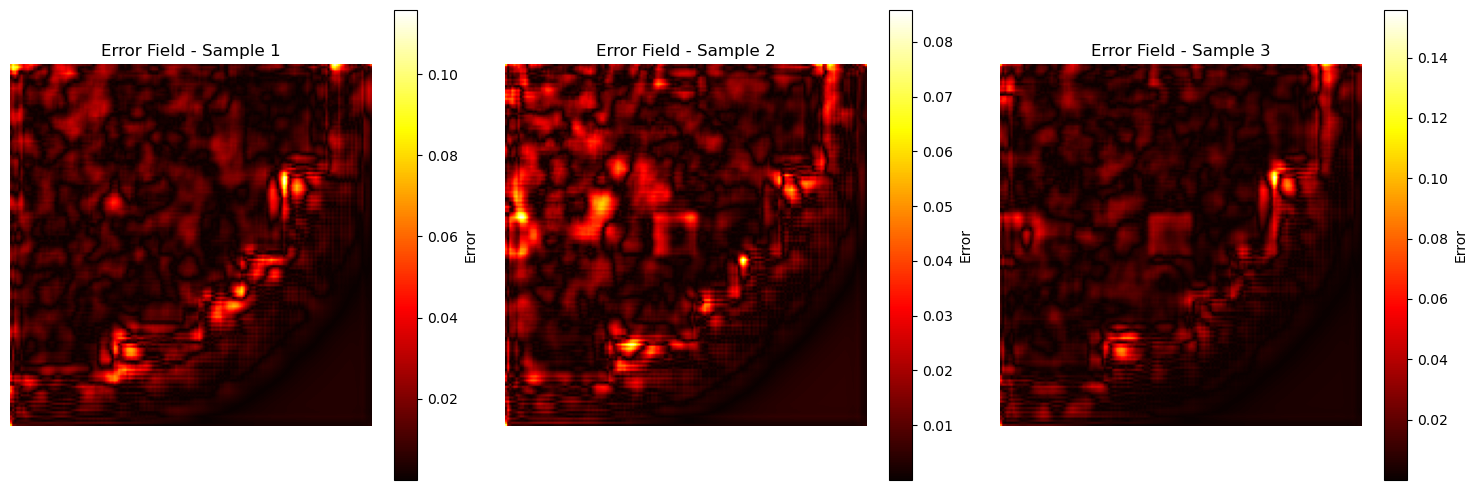

In [33]:
# Visualize error fields for 3 samples
n_samples = 3  # Number of samples to display
plt.figure(figsize=(15, 5))

for i in range(n_samples):
    # Calculate the error field for each sample (absolute difference between original and predicted phi2)
    error_field = np.abs(y_test[i] - predicted_phi2[i])

    # Plot the error field
    plt.subplot(1, n_samples, i + 1)
    plt.imshow(error_field.squeeze(), cmap='hot', extent=[0, 171, 0, 171])
    plt.colorbar(label='Error')
    plt.title(f'Error Field - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## 3 - Residual : 

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ phi2_input          │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mask_input          │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_3          │ (None, 171, 171,  │          0 │ phi2_input[0][0], │
│ (Multiply)          │ 1)                │            │ mask_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 171, 171,  │        320 │ multiply_3[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 86, 86,    │          0 │ conv2d_12[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 86, 86,    │     18,496 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 86, 86,    │     36,928 │ conv2d_14[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 86, 86,    │      2,112 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 86, 86,    │          0 │ conv2d_15[0][0],  │
│                     │ 64)               │            │ conv2d_13[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 86, 86,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 43, 43,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_8  │ (None, 43, 43,    │     36,928 │ max_pooling2d_9[… │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_8     │ (None, 86, 86,    │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_9  │ (None, 86, 86,    │     18,464 │ up_sampling2d_8[… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_9     │ (None, 172, 172,  │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 172, 172,  │        289 │ up_sampling2d_9[… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cropping2d_2        │ (None, 171, 171,  │          0 │ conv2d_16[0][0] 

 Total params: 113,537 (443.50 KB)

 Trainable params: 113,537 (443.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 28s 788ms/step - loss: 0.0487 - val_loss: 0.0029
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 787ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 779ms/step - loss: 0.0012 - val_loss: 8.2136e-04
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 782ms/step - loss: 8.6806e-04 - val_loss: 6.2102e-04
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 780ms/step - loss: 5.7906e-04 - val_loss: 5.9175e-04
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 774ms/step - loss: 6.3479e-04 - val_loss: 4.5387e-04
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 783ms/step - loss: 4.1880e-04 - val_loss: 3.7694e-04
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 780ms/step - loss: 3.6025e-04 - val_loss: 3.2645e-04
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 775ms/step - loss: 3.1700e-04 - val_loss: 3.6140e-04
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 779ms/step - loss: 3.0072e-04 - val_loss: 2.6613e-04
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 775ms/step - loss: 2.3820e

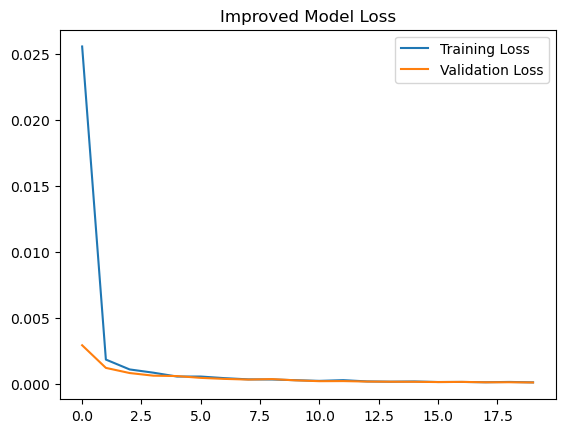

In [35]:
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Define a weighted MSE loss
def weighted_mse(y_true, y_pred):
    # Compute spatial gradients of the true values (edge detection)
    grad_x, grad_y = tf.image.image_gradients(y_true)
    gradient_magnitude = tf.sqrt(grad_x**2 + grad_y**2)
    
    # Add a small constant to avoid zero weights
    weights = gradient_magnitude + 1.0  # Edge-aware weights
    
    # Weighted MSE loss
    return tf.reduce_mean(weights * tf.square(y_true - y_pred))

# Residual Block
def residual_block(x, filters):
    # Shortcut with 1x1 convolution to match dimensions
    shortcut = layers.Conv2D(filters, (1, 1), activation=None, padding='same')(x)
    
    # Main convolutional path
    x = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(filters, (3, 3), activation=None, padding='same')(x)
    
    # Add shortcut to the main path
    x = layers.Add()([x, shortcut])
    return layers.Activation('relu')(x)


# Define the improved model with dimension cropping
input_shape = (171, 171, 1)
mask_input_shape = (171, 171, 1)

# Inputs for phi2 and the mask
phi2_input = layers.Input(shape=input_shape, name="phi2_input")
mask_input = layers.Input(shape=mask_input_shape, name="mask_input")

# Combine masked input (phi2 with mask applied)
masked_phi2 = layers.Multiply()([phi2_input, mask_input])

# Residual CNN architecture
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(masked_phi2)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = residual_block(x, 64)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Cropping to match dimensions
output = layers.Cropping2D(cropping=((0, 1), (0, 1)))(output)

# Create the improved model
improved_model = models.Model(inputs=[phi2_input, mask_input], outputs=output)
improved_model.compile(optimizer='adam', loss=weighted_mse)
improved_model.summary()

# Train the improved model
improved_history = improved_model.fit(
    [X_train, masks_train], y_train,  # y_train is now phi2 (target)
    validation_data=([X_test, masks_test], y_test),  # y_test is phi2 (target)
    epochs=20,
    batch_size=32
)

# Plot training loss
plt.plot(improved_history.history['loss'], label='Training Loss')
plt.plot(improved_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Improved Model Loss')
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step


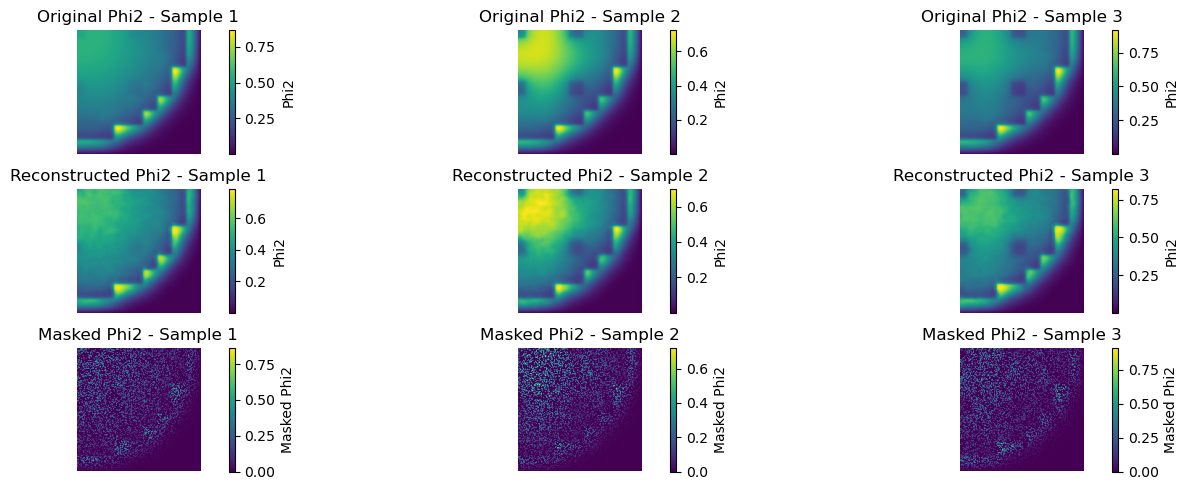

In [37]:
# Predict phi2 from masked phi2
predicted_phi2 = improved_model.predict([X_test, masks_test])

# Visualize results
n_samples = 3  # Number of samples to display
plt.figure(figsize=(15, 5))
for i in range(n_samples):
    # Original Phi2
    plt.subplot(3, n_samples, i + 1)
    plt.imshow(y_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Phi2')
    plt.title(f'Original Phi2 - Sample {i+1}')
    plt.axis('off')

    # Reconstructed Phi2 
    plt.subplot(3, n_samples, i + 1 + n_samples)
    plt.imshow(predicted_phi2[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Phi2')
    plt.title(f'Reconstructed Phi2 - Sample {i+1}')
    plt.axis('off')

    # Input Phi2 (Masked)
    plt.subplot(3, n_samples, i + 1 + 2 * n_samples)
    plt.imshow(X_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Masked Phi2')
    plt.title(f'Masked Phi2 - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [39]:
# Calculate metrics
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test.flatten(), predicted_phi2.flatten()))
print(f"RMSE: {rmse}")

# Calculate L∞ Error (Maximum absolute error)
l_inf_error = np.max(np.abs(y_test - predicted_phi2))
print(f"L∞ Error: {l_inf_error}")

# Calculate SSIM (Structural Similarity Index) for the first sample
ssim_index = ssim(
    y_test[0].squeeze(), 
    predicted_phi2[0].squeeze(), 
    data_range=predicted_phi2[0].max() - predicted_phi2[0].min()
)
print(f"SSIM: {ssim_index}")

# Calculate Relative L2 Error
l2_error = np.linalg.norm(y_test - predicted_phi2)
true_l2_norm = np.linalg.norm(y_test)
relative_l2_error = (l2_error / true_l2_norm) * 100  # Convert to percentage
print(f"Relative L2 Error: {relative_l2_error:.2f}%")



RMSE: 0.010171561449089204
L∞ Error: 0.20844477829036634
SSIM: 0.96125461198563
Relative L2 Error: 2.88%


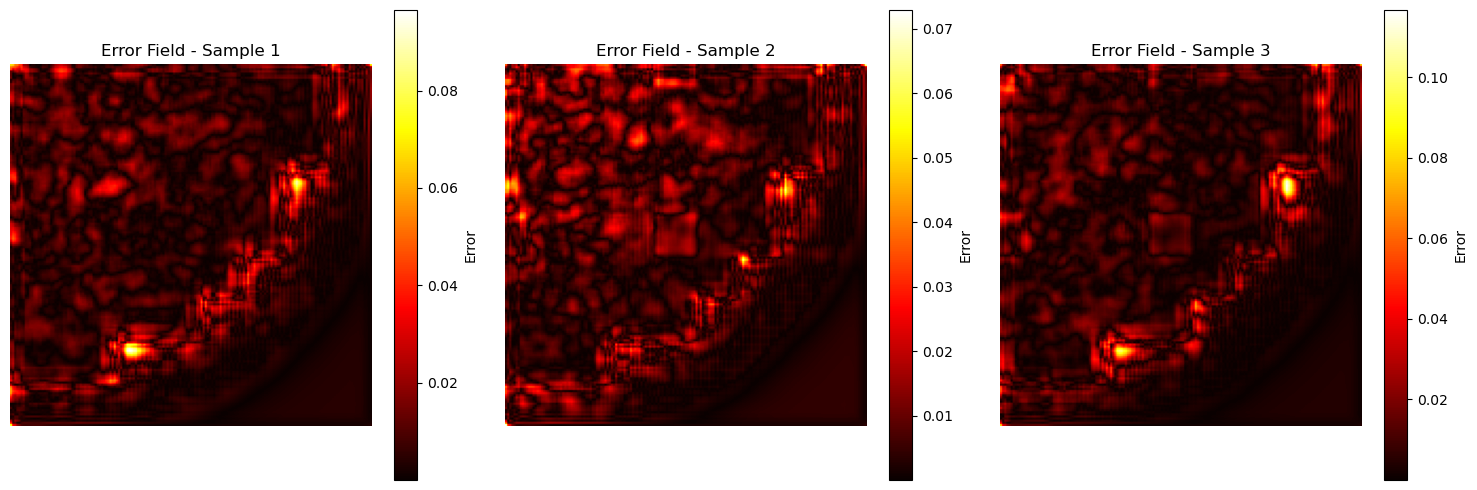

In [41]:
# Visualize error fields
n_samples = 3
plt.figure(figsize=(15, 5))

for i in range(n_samples):
    # Calculate the error field
    error_field = np.abs(y_test[i] - predicted_phi2[i])

    # Plot the error field
    plt.subplot(1, n_samples, i + 1)
    plt.imshow(error_field.squeeze(), cmap='hot', extent=[0, 171, 0, 171])
    plt.colorbar(label='Error')
    plt.title(f'Error Field - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## 4 - U-Net : 

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ phi2_input          │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mask_input          │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 171, 171,  │          0 │ phi2_input[0][0], │
│ (Multiply)          │ 1)                │            │ mask_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 171, 171,  │        320 │ multiply_1[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 171, 171,  │      9,248 │ conv2d_7[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 86, 86,    │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 86, 86,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 86, 86,    │     36,928 │ conv2d_9[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 43, 43,    │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 43, 43,    │     73,856 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 43, 43,    │    147,584 │ conv2d_11[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_2  │ (None, 43, 43,    │     73,792 │ conv2d_12[0][0]   │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_2     │ (None, 86, 86,    │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_2 (Lambda)   │ (None, 86, 86,    │          0 │ up_sampling2d_2[… │
│                     │ 64)               │            │ conv2d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 86, 86,    │          0 │ lambda_2[0][0],   │
│ (Concatenate)       │ 128)              │            │ conv2d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_3  │ (None, 86, 86,    │     36,896 │ concatenate_2[0]… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_3     │ (None, 172, 172,  │          0 │ conv2d_transpose

 Total params: 397,697 (1.52 MB)

 Trainable params: 397,697 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - loss: 0.0496 - val_loss: 0.0054
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - loss: 0.0038 - val_loss: 0.0014
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - loss: 0.0011 - val_loss: 5.3389e-04
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - loss: 5.2897e-04 - val_loss: 6.9014e-04
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - loss: 4.5568e-04 - val_loss: 2.3364e-04
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - loss: 2.3347e-04 - val_loss: 2.6215e-04
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - loss: 2.5909e-04 - val_loss: 1.4676e-04
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - loss: 1.3565e-04 - val_loss: 1.0692e-04
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - loss: 1.3755e-04 - val_loss: 9.3687e-05
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - loss: 9.6610e-05 - val_loss: 8.2891e-05
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - loss: 1.0028e-04 - val_loss: 1.1392e-04
Epoch 

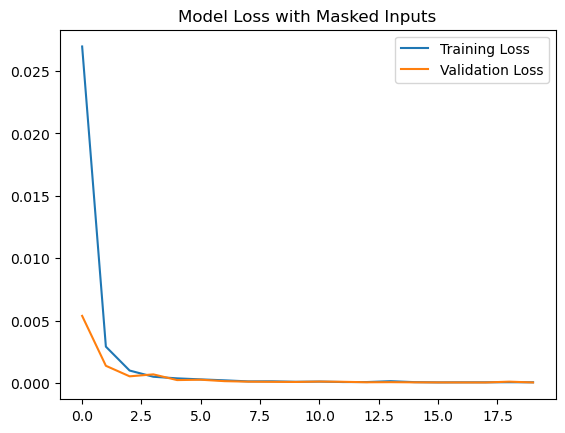

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load and normalize data
phi2 = data_reshaped1.reshape((1331, 171, 171, 1))  # Shape: (1331, 171, 171, 1) (phi2)
phi2_norm = phi2 / np.max(phi2)  # Normalize phi2 data

# Define function to generate random masks with different sparsity levels
def generate_random_mask(shape, sparsity=0.8):
    mask = np.random.choice([0, 1], size=shape, p=[sparsity, 1 - sparsity])
    return mask

# Apply random masks to phi2 data
masks = np.array([generate_random_mask(phi2_norm[0].shape) for _ in range(len(phi2_norm))])
phi2_masked = phi2_norm * masks  # Masked phi2

# Split into training and testing sets
X_train, X_test, y_train, y_test, masks_train, masks_test = train_test_split(
    phi2_masked, phi2_norm, masks, test_size=0.2, random_state=42
)

# Define the U-Net model for predicting phi2
def unet_model(input_shape):
    phi2_input = layers.Input(input_shape, name="phi2_input")
    mask_input = layers.Input(input_shape, name="mask_input")
    
    # Combine masked input
    masked_phi2 = layers.Multiply()([phi2_input, mask_input])

    # Encoder (Downsampling path)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(masked_phi2)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2), padding='same')(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2), padding='same')(c2)

    # Bottleneck
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    # Decoder (Upsampling path)
    u1 = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(c3)
    u1 = layers.UpSampling2D((2, 2))(u1)
    u1 = layers.Lambda(lambda tensors: tf.image.resize(tensors[0], tf.shape(tensors[1])[1:3]))([u1, c2])
    u1 = layers.Concatenate()([u1, c2])

    u2 = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(u1)
    u2 = layers.UpSampling2D((2, 2))(u2)
    u2 = layers.Lambda(lambda tensors: tf.image.resize(tensors[0], tf.shape(tensors[1])[1:3]))([u2, c1])
    u2 = layers.Concatenate()([u2, c1])

    # Output layer with precise cropping
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(u2)
    outputs = layers.Cropping2D(cropping=((0, 0), (0, 0)))(outputs)  # Exact match to 171x171

    # Create and compile the model
    model = models.Model(inputs=[phi2_input, mask_input], outputs=outputs)
    return model

# Input shape
input_shape = (171, 171, 1)

# Build and compile the U-Net model
unet = unet_model(input_shape)
unet.compile(optimizer='adam', loss='mse')
unet.summary()

# Train the model
history = unet.fit(
    [X_train, masks_train], y_train,  # Input is masked phi2 and the mask
    validation_data=([X_test, masks_test], y_test),  # Validation data
    epochs=20,  # Set the number of epochs as per your requirements
    batch_size=32  # Set the batch size as needed
)

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss with Masked Inputs')
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Predict the output for the noisy input (masked phi2)
predicted_phi2 = unet.predict([X_test, masks_test])

# Flatten the images for metric calculations
y_true_flat = y_test.flatten()  # True phi2 values
y_pred_flat = predicted_phi2.flatten()  # Predicted phi2 values

# 1. Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))

# 2. Calculate L∞ Error (Maximum absolute error)
l_inf_error = np.max(np.abs(y_true_flat - y_pred_flat))

# 3. Calculate SSIM (Structural Similarity Index)
ssim_index = ssim(y_test[0].reshape(171, 171), predicted_phi2[0].reshape(171, 171), data_range=1)

# 4. Calculate L2 Error
l2_error = np.linalg.norm(y_true_flat - y_pred_flat)

# 5. Calculate Relative L2 Error
true_l2_norm = np.linalg.norm(y_true_flat)
relative_l2_error = (l2_error / true_l2_norm) * 100  # Convert to percentage

# Print the results
print(f"Metrics for Reconstructed Phi2 (sparsity = 0.2):")
print(f"RMSE: {rmse}")
print(f"L∞ Error: {l_inf_error}")
print(f"SSIM: {ssim_index}")
print(f"L2 Error: {l2_error}")
print(f"Relative L2 Error: {relative_l2_error:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 458ms/step
Metrics for Reconstructed Phi2 (sparsity = 0.2):
RMSE: 0.006515498911662121
L∞ Error: 0.15985550126878073
SSIM: 0.9908402822527758
L2 Error: 18.205366136412177
Relative L2 Error: 1.84%


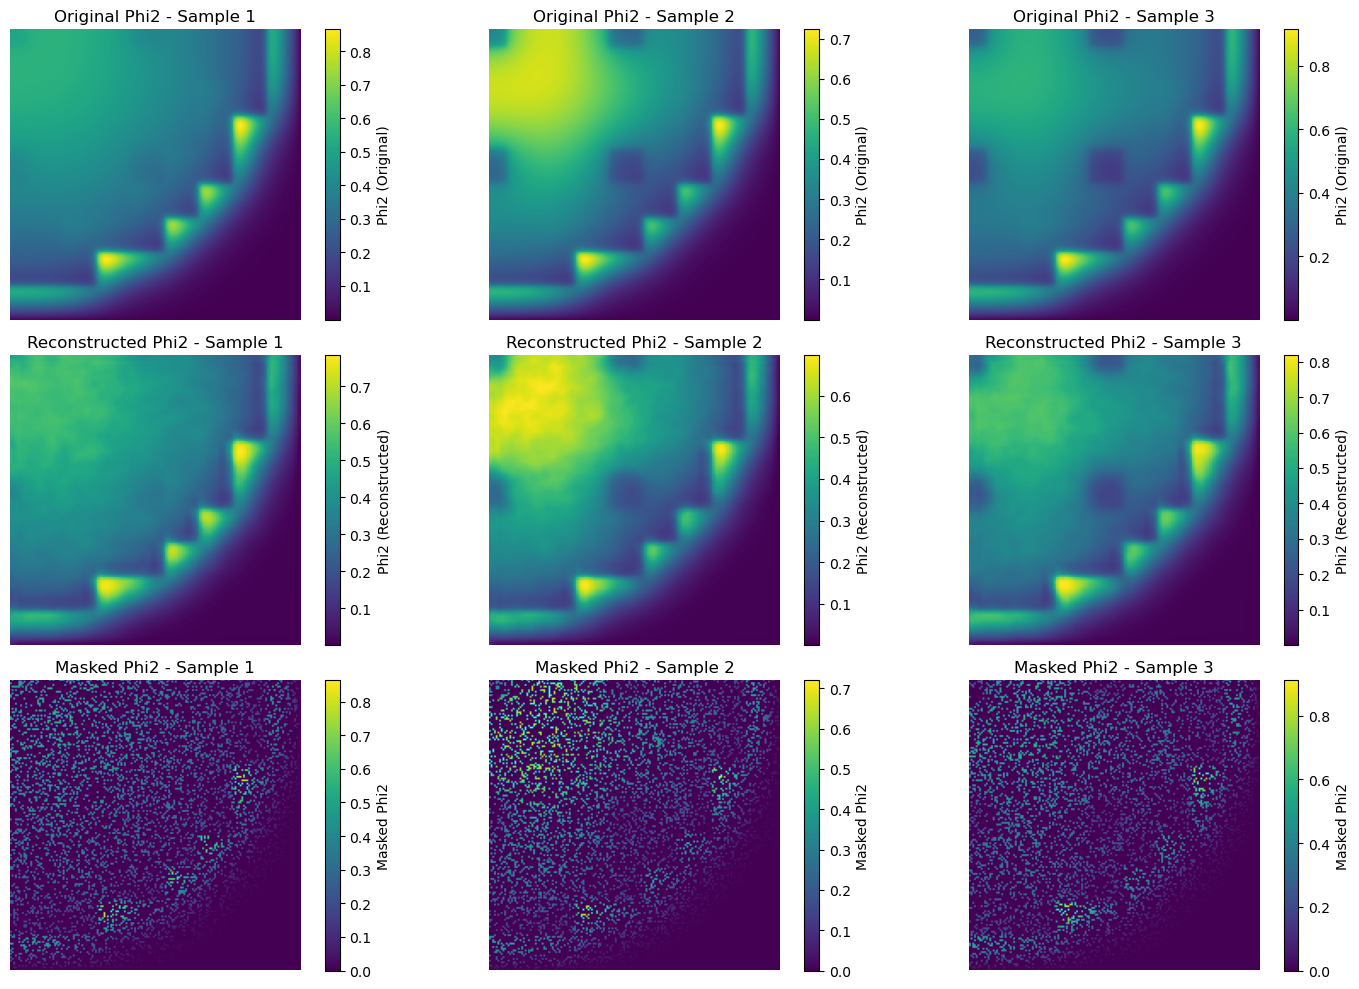

In [55]:
import matplotlib.pyplot as plt

# Number of samples to display
n_samples = 3

# Plot the results for the given samples
plt.figure(figsize=(15, 10))

for i in range(n_samples):
    # Original Phi2 (Ground truth)
    plt.subplot(3, n_samples, i + 1)
    plt.imshow(y_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Phi2 (Original)')
    plt.title(f'Original Phi2 - Sample {i+1}')
    plt.axis('off')

    # Reconstructed Phi2 (Predicted by U-Net)
    plt.subplot(3, n_samples, i + 1 + n_samples)
    plt.imshow(predicted_phi2[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Phi2 (Reconstructed)')
    plt.title(f'Reconstructed Phi2 - Sample {i+1}')
    plt.axis('off')

    # Masked Phi2 (Input to the model)
    plt.subplot(3, n_samples, i + 1 + 2 * n_samples)
    plt.imshow(X_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Masked Phi2')
    plt.title(f'Masked Phi2 - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step


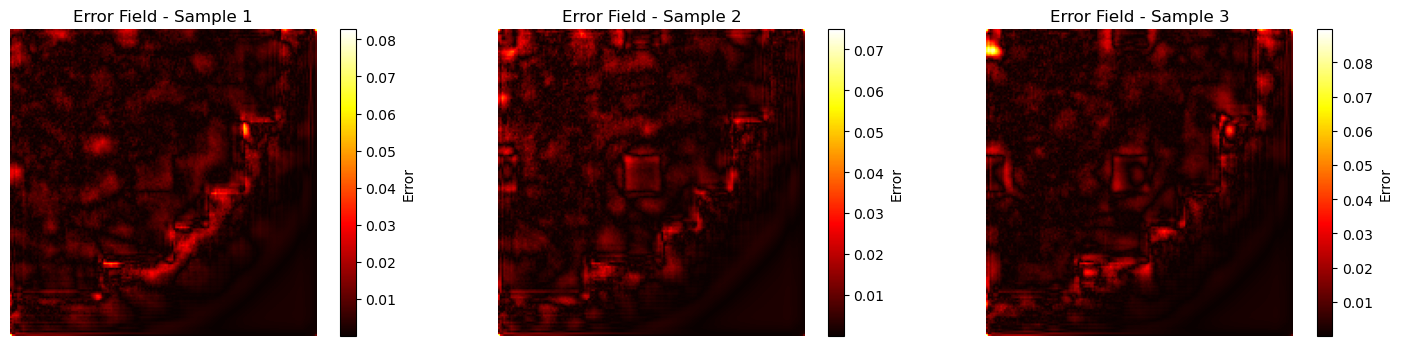

In [57]:
# Generate predictions from the trained U-Net model
predicted_phi2 = unet.predict([X_test, masks_test])  # Using masked phi2 and the mask as inputs

# Visualize error fields for 3 samples
n_samples = 3  # Number of samples to display
plt.figure(figsize=(15, 10))

for i in range(n_samples):
    # Calculate the error field for each sample (absolute difference between original and predicted phi2)
    error_field = np.abs(y_test[i] - predicted_phi2[i])
    
    # Plot the error field
    plt.subplot(3, n_samples, i + 1)
    plt.imshow(error_field.squeeze(), cmap='hot', extent=[0, 171, 0, 171])
    plt.colorbar(label='Error')
    plt.title(f'Error Field - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
